# Credit Card Approval Prediction


link to dataset - https://www.kaggle.com/rikdifos/credit-card-approval-prediction

### DataSet Info

|Columns|Info|
|:--|:--|
|ID|Client number|
|CODE_GENDER|Gender|
|FLAG_OWN_CAR|Is there a car|
|FLAG_OWN_REALTY|Is there a property|
|CNT_CHILDREN|Number of children|
|AMT_INCOME_TOTAL|Annual income|
|NAME_INCOME_TYPE|Income category|
|NAME_EDUCATION_TYPE|Education level|
|NAME_FAMILY_STATUS|Marital status|
|NAME_HOUSING_TYPE|Way of living|
|DAYS_BIRTH|Birthday|
|DAYS_EMPLOYED|Start date of employment|
|FLAG_MOBIL|Is there a mobile phone|
|FLAG_WORK_PHONE|Is there a work phone|
|FLAG_PHONE|Is there a phone|
|FLAG_EMAIL|Is there an email|
|OCCUPATION_TYPE|Occupation|
|CNT_FAM_MEMBERS|Family size|


###### Credit Record.csv

|Columns|Info|
|:--|:--|
|ID|Client number|
|MONTHS_BALANCE|Record month|
|STATUS|Status|


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Loading dataset and normal data checking

In [ ]:
#Load the dataset
from google.colab import files
#file = files.upload()  #upload file into google colab session

from google.colab import drive
drive.mount('/content/drive')
application_df = pd.read_csv("/content/drive/MyDrive/Datasets Project Dme/application_record.csv") 
credit_df=pd.read_csv("/content/drive/MyDrive/Datasets Project Dme/credit_record.csv")


Mounted at /content/drive


In [ ]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application_df.shape

(438557, 18)

In [ ]:
credit_df.shape

(1048575, 3)

In [ ]:
# Merging both dataframes
final_df = pd.merge(credit_df,application_df, left_on = 'ID', right_on = 'ID', how = 'inner')
final_df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [ ]:
final_df.shape

(777715, 20)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [ ]:
final_df.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


#Missing values count

In [ ]:
final_df.isnull().sum()

ID                          0
MONTHS_BALANCE              0
STATUS                      0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
dtype: int64

<Axes: >

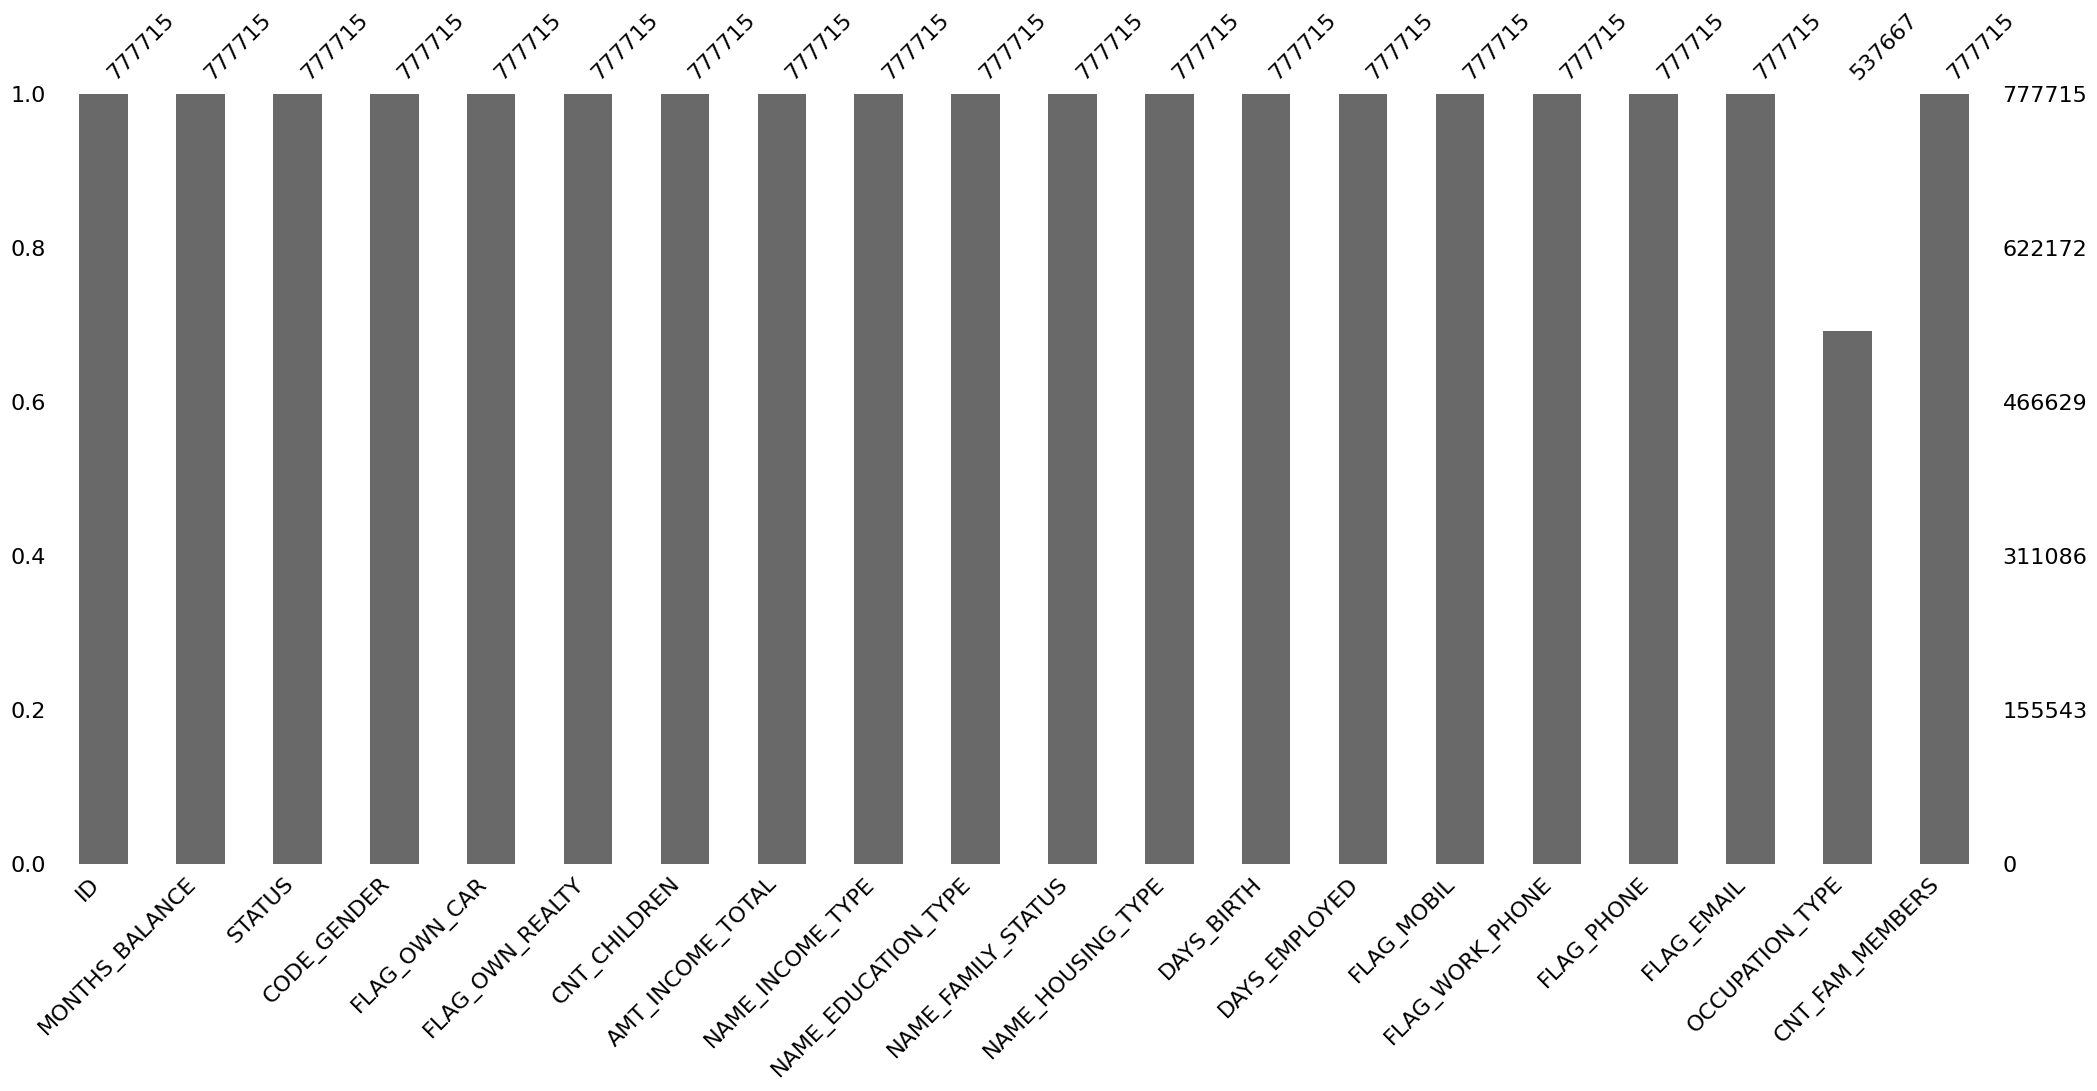

In [ ]:
# Visualization of null values
msno.bar(final_df)

<Axes: >

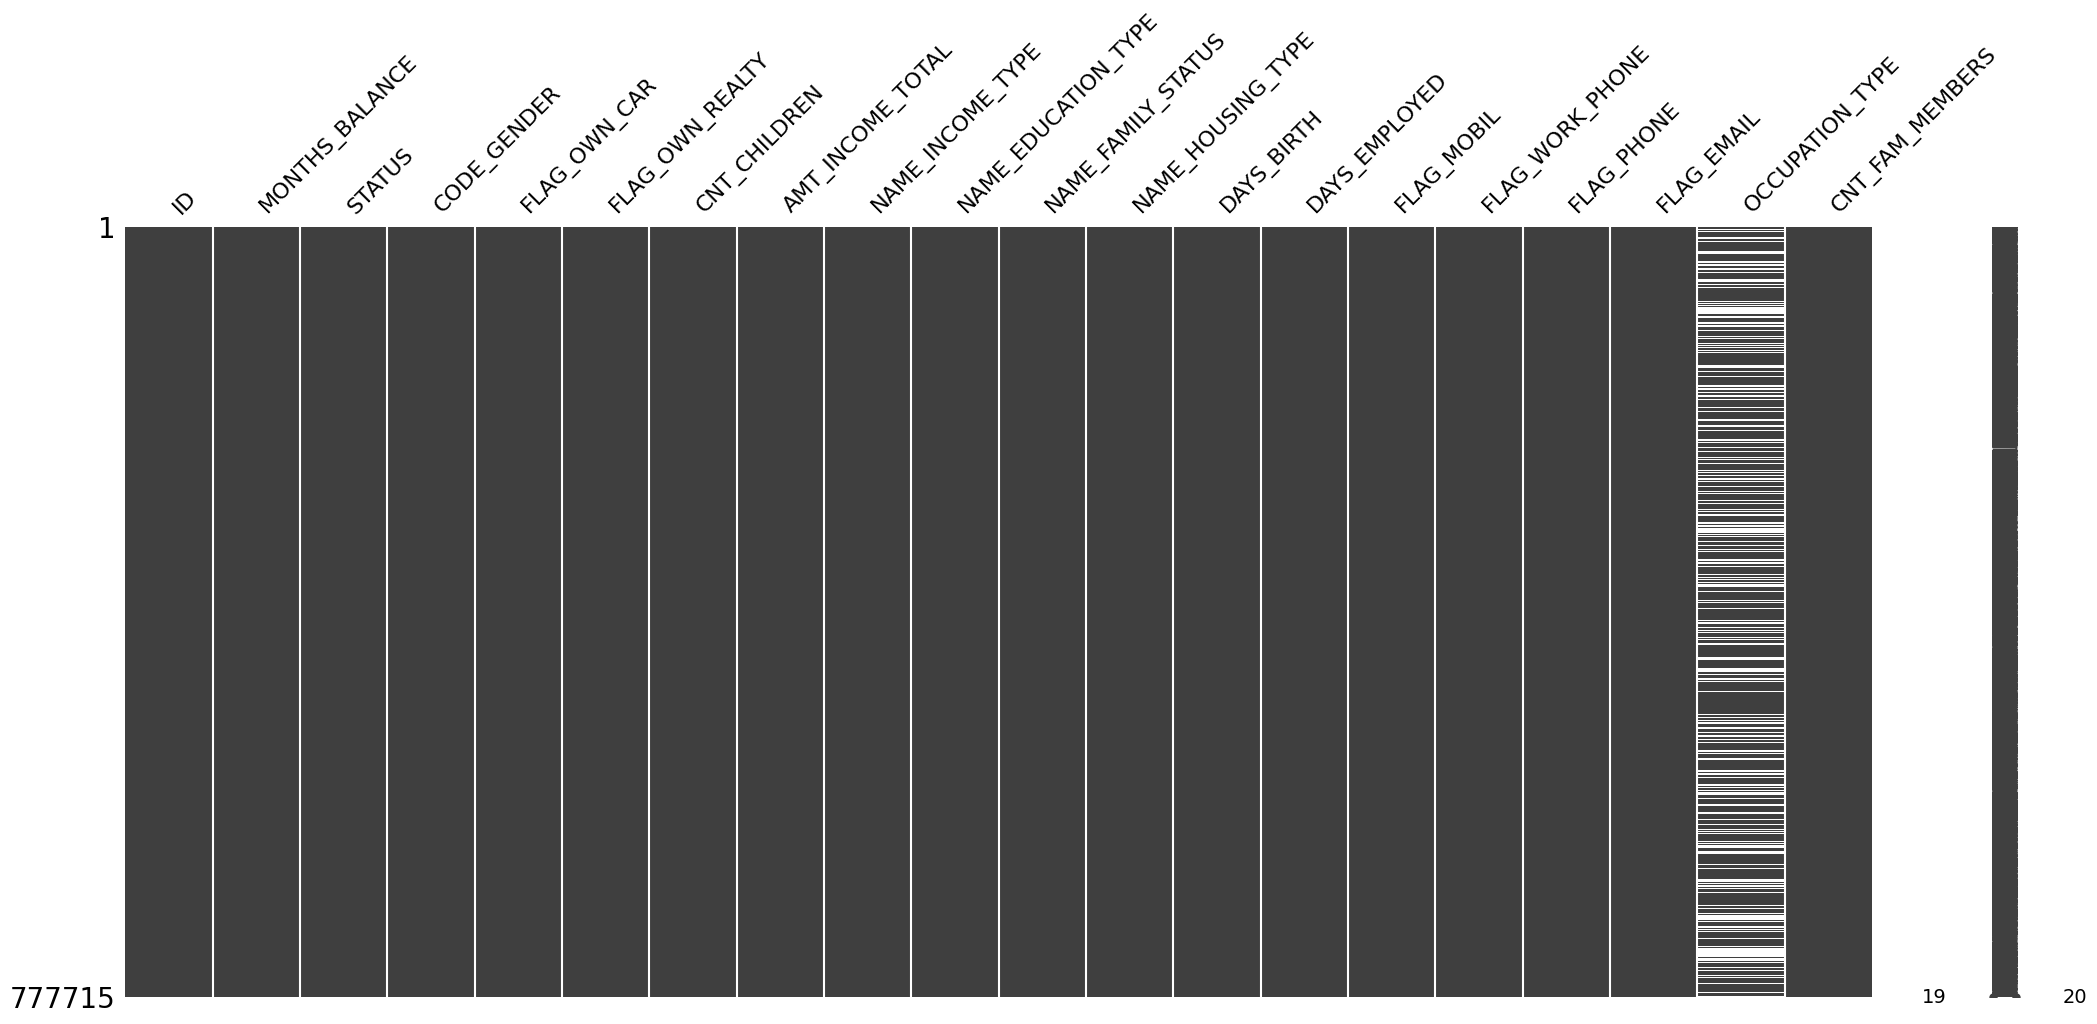

In [ ]:
# Gives positional information of the missing values
msno.matrix(final_df)

#Checking for Duplicate Values

In [ ]:
final_df.duplicated().sum()

0

In [ ]:
# Now checking for null values specifically OCCUPATION_TYPE
final_df['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
final_df['OCCUPATION_TYPE'].fillna('Other/Not Mentioned',inplace=True)

final_df.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
final_df.isnull().sum()

ID                     0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [ ]:
final_df['FLAG_MOBIL']

0         1
1         1
2         1
3         1
4         1
         ..
777710    1
777711    1
777712    1
777713    1
777714    1
Name: FLAG_MOBIL, Length: 777715, dtype: int64

In [ ]:
# dropping flag_mobil
final_df1=final_df.drop('FLAG_MOBIL', axis=1)

<Axes: >

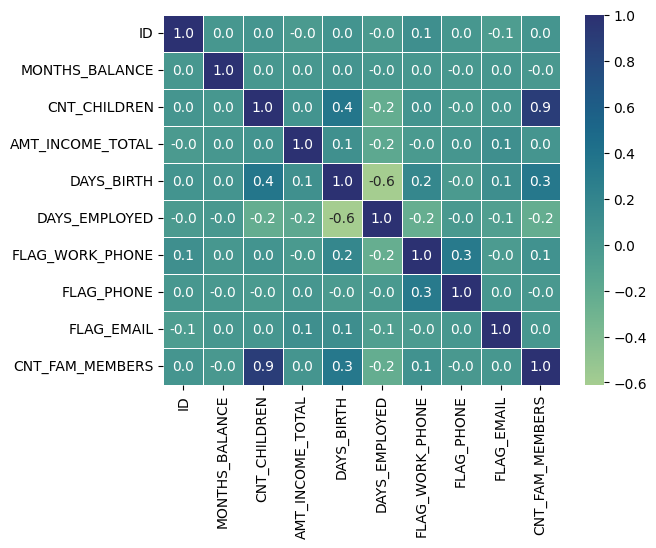

In [ ]:
# generating heatmap
sns.heatmap(final_df1.corr(),annot=True, fmt=".1f", linewidth=.5, cmap="crest")

In [ ]:
final_df.corr()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,0.005007,0.026269,-0.027597,0.042020,-0.025322,NaN,0.084800,0.006346,-0.056083,0.027375
MONTHS_BALANCE,0.005007,1.000000,0.000913,0.001831,0.035756,-0.004222,NaN,0.001529,-0.005120,0.005288,-0.006276
CNT_CHILDREN,0.026269,0.000913,1.000000,0.039304,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079
AMT_INCOME_TOTAL,-0.027597,0.001831,0.039304,1.000000,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379
DAYS_BIRTH,0.042020,0.035756,0.356177,0.081231,1.000000,-0.608856,NaN,0.180658,-0.026717,0.100945,0.327750
DAYS_EMPLOYED,-0.025322,-0.004222,-0.228945,-0.180674,-0.608856,1.000000,NaN,-0.243677,-0.013817,-0.082474,-0.227645
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.084800,0.001529,0.042226,-0.021229,0.180658,-0.243677,NaN,1.000000,0.312552,-0.037991,0.060183
FLAG_PHONE,0.006346,-0.005120,-0.018882,0.018687,-0.026717,-0.013817,NaN,0.312552,1.000000,0.011901,-0.007824
FLAG_EMAIL,-0.056083,0.005288,0.015726,0.085776,0.100945,-0.082474,NaN,-0.037991,0.011901,1.000000,0.012540


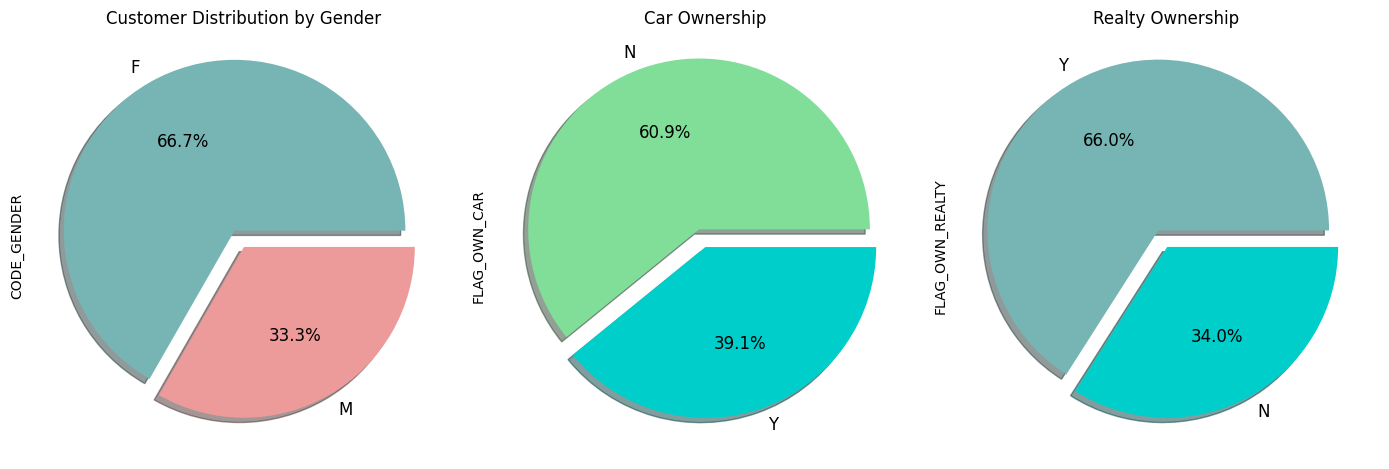

In [ ]:
fig, axes = plt.subplots(1,3)
g1= final_df['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.01],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= final_df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.01],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= final_df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.01],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

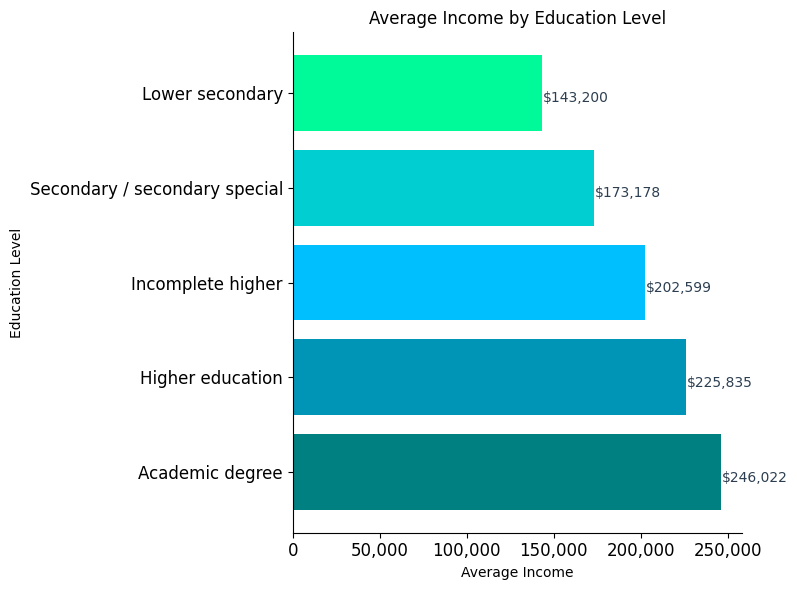

In [ ]:
import matplotlib.pyplot as plt

# Assuming application_record is the name of your DataFrame
# and NAME_EDUCATION_TYPE and AMT_INCOME_TOTAL are columns in the DataFrame

# Group the data by NAME_EDUCATION_TYPE and calculate the mean of AMT_INCOME_TOTAL
grouped_data = final_df.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean()

# Sort the values in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Create a horizontal bar plot with custom colors and title
plt.figure(figsize=(8, 6))
plt.barh(sorted_data.index, sorted_data.values, color=['#008080', '#0095B6', '#00BFFF', '#00CED1', '#00FA9A'])
plt.title("Average Income by Education Level")

# Set x-axis label and format the tick labels with comma separator
plt.xlabel("Average Income")
plt.xticks(fontsize=12)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set y-axis label and tick labels
plt.ylabel("Education Level")
plt.yticks(fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add data labels to the bars
for i, v in enumerate(sorted_data.values):
    plt.text(v+500, i-0.1, "${:,.0f}".format(v), fontsize=10, color='#2c3e50')

# Show the plot
plt.tight_layout()
plt.show()


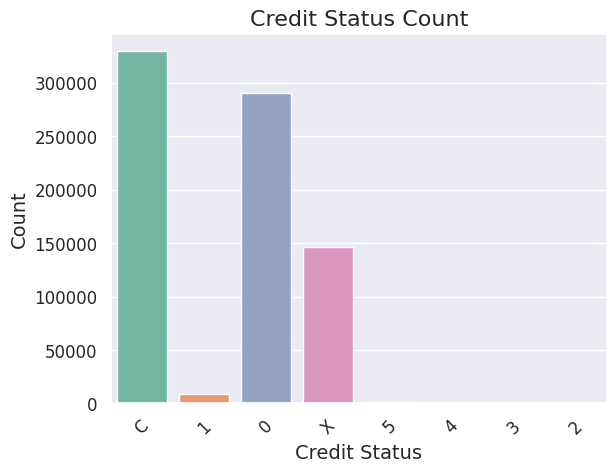

In [ ]:
sns.set(style='darkgrid')
sns.countplot(x=final_df['STATUS'], palette='Set2')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Credit Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Credit Status Count', fontsize=16)
plt.show()


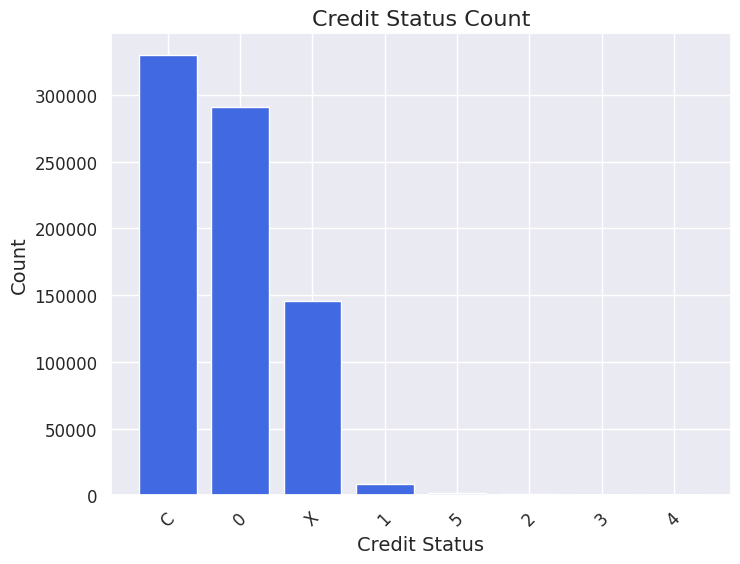

In [ ]:
def countplot_credit(data):
    counts = data['STATUS'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(counts.index, counts.values, color='royalblue')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Credit Status', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Credit Status Count', fontsize=16)
    plt.show()
countplot_credit(final_df)

In [ ]:
# Checking Non-Numerical Columns

char_var = final_df.columns[(final_df.dtypes =='object').values].tolist()
char_var

['STATUS',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [ ]:
# Checking Numerical Columns

Num_var=final_df.columns[(final_df.dtypes !='object').values].tolist()
Num_var

['ID',
 'MONTHS_BALANCE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [ ]:
# calculating /value counts for categorical columns

for i in final_df.columns[(final_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(final_df[i].value_counts())
    print('-----------------------------------------------')

STATUS 

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64
-----------------------------------------------
CODE_GENDER 

F    518851
M    258864
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree

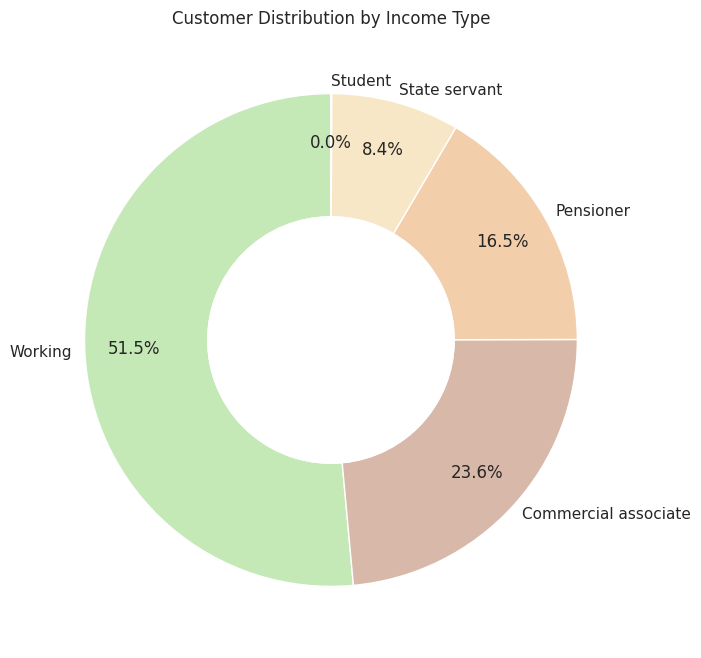

In [ ]:
import matplotlib.pyplot as plt

# Define the pastel colors to use for the chart
colors = ['#C5E8B7', '#D8B9A9', '#F2CEAB', '#F7E7C6', '#BFD7EA', '#9DB7E9', '#C8A2C8']

# Get the counts for each income type
counts = final_df['NAME_INCOME_TYPE'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.05, wedgeprops={'width': 0.5, 'edgecolor': 'white'}, colors=colors)
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig.gca().add_artist(centre_circle)

# Set the title
ax.set_title('Customer Distribution by Income Type')

plt.show()

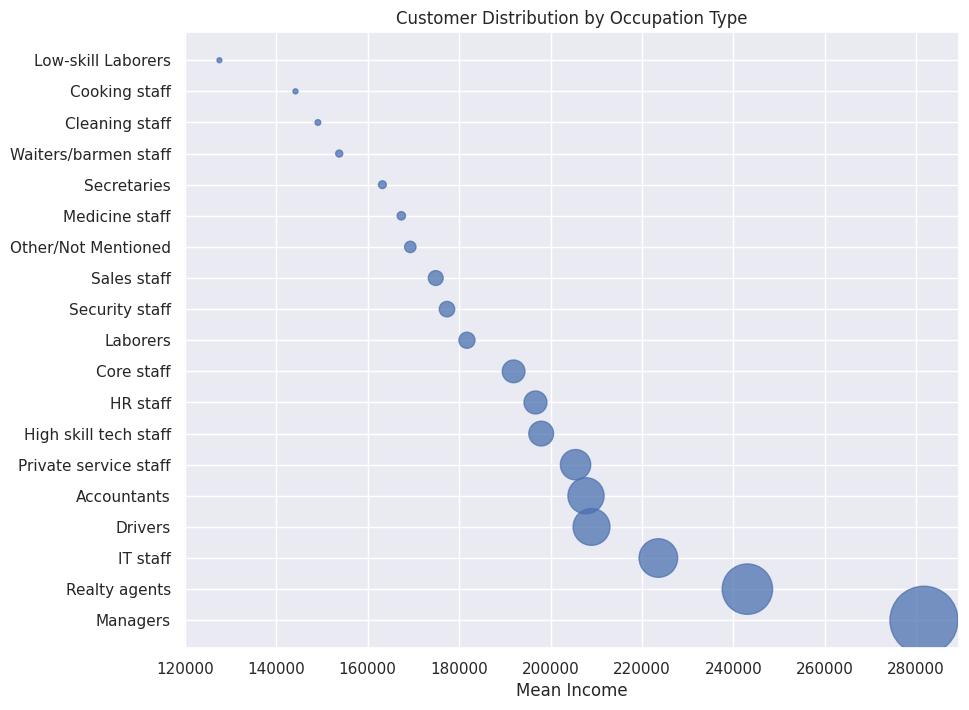

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the counts and mean income for each occupation type
counts = final_df['OCCUPATION_TYPE'].value_counts()
mean_income = final_df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)

# Set up the chart data
x = mean_income.values
y = np.arange(len(x))
size = counts.values/100

# Create the bubble chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, s=size,  alpha=0.75)

# Set the x-axis labels and title
ax.set_yticks(y)
ax.set_yticklabels(mean_income.index)
ax.set_xlabel('Mean Income')
ax.set_title('Customer Distribution by Occupation Type')

plt.show()

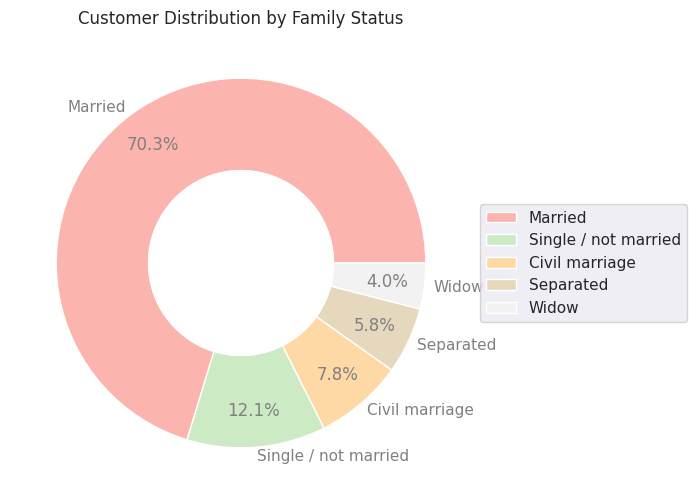

In [ ]:
#mport matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Get the counts for each family status
counts = final_df['NAME_FAMILY_STATUS'].value_counts()

# Define a colormap to generate the colors
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.linspace(0, 1, len(counts)))

# Create the donut chart
wedges, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.05, wedgeprops={'width': 0.5, 'edgecolor': 'white', 'linewidth': 1}, colors=colors)

# Set the title and legend
plt.title('Customer Distribution by Family Status')
plt.legend(wedges, counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the text color for the labels and percentages
for text in texts:
    text.set_color('gray')
for autotext in autotexts:
    autotext.set_color('gray')

# Add a circle in the middle to create the donut shape
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(final_df[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        final_df.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other/Not Mentioned': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lo

In [ ]:
final_df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
1,5008804,-1,C,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
2,5008804,-2,C,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
3,5008804,-3,C,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
4,5008804,-4,C,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0


In [ ]:
final_df['DAYS_BIRTH'].value_counts()

-14667    1018
-15140     928
-15675     835
-16995     799
-15519     799
          ... 
-18983       1
-7489        1
-20216       1
-22482       1
-16837       1
Name: DAYS_BIRTH, Length: 7183, dtype: int64

<Axes: >

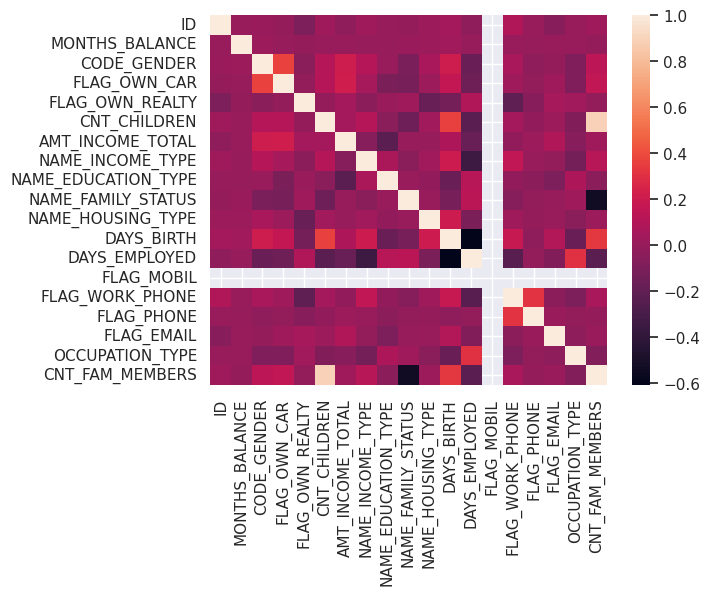

In [ ]:
sns.heatmap(final_df.corr())

In [ ]:
final_df['AMT_INCOME_TOTAL'].value_counts()

135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
            ...  
44550.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64

In [ ]:
final_df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
# Replace X,C values with 0 as they are identified as Good clients
final_df.replace(['X','C'],0,inplace=True)

In [ ]:
final_df['STATUS'].value_counts()

0    475486
0    290654
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
final_df['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
final_df['STATUS'] = final_df['STATUS'].astype('int')
final_df['STATUS'] = final_df['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [ ]:
final_df.STATUS.value_counts()

0    774887
1      2828
Name: STATUS, dtype: int64

In [ ]:
final_df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
1,5008804,-1,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
2,5008804,-2,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
3,5008804,-3,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
4,5008804,-4,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0


In [ ]:
final_df['STATUS']

0         0
1         0
2         0
3         0
4         0
         ..
777710    0
777711    0
777712    0
777713    0
777714    0
Name: STATUS, Length: 777715, dtype: int64

In [ ]:
final_df.describe()
y=final_df.loc[:,'STATUS']
x=final_df.loc[:, final_df.columns != 'STATUS']

y=y.to_frame(name='STATUS')

In [ ]:
x.head()

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
1,5008804,-1,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
2,5008804,-2,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
3,5008804,-3,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0
4,5008804,-4,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0


In [ ]:
y.head()

,STATUS
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 10)

In [ ]:
x_train.describe()

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,6.221720e+05,622172.000000,622172.000000,622172.000000,622172.000000,622172.000000,6.221720e+05,622172.000000,622172.000000,622172.000000,622172.000000,622172.000000,622172.000000,622172.0,622172.000000,622172.000000,622172.000000,622172.000000,622172.000000
mean,5.078757e+06,-19.367066,0.333040,0.391154,0.659014,0.427917,1.885591e+05,2.394401,3.082345,1.342386,1.267156,-16122.502151,57615.335844,1.0,0.231855,0.300898,0.091708,9.095395,2.209172
std,4.182143e+04,14.074768,0.471301,0.488009,0.474041,0.745047,1.017451e+05,1.735881,1.347329,0.928204,0.924816,4103.705601,136325.384641,0.0,0.422018,0.458649,0.288613,4.266689,0.906348
min,5.008804e+06,-60.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.044591e+06,-29.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19451.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,6.000000,2.000000
50%,5.069532e+06,-17.000000,0.000000,0.000000,1.000000,0.000000,1.620000e+05,4.000000,4.000000,1.000000,1.000000,-15759.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,10.000000,2.000000
75%,5.115554e+06,-8.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12712.000000,-431.000000,1.0,0.000000,1.000000,0.000000,12.000000,3.000000
max,5.150487e+06,0.000000,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,18.000000,20.000000


In [ ]:
x_test.describe()

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,1.555430e+05,155543.000000,155543.000000,155543.000000,155543.000000,155543.000000,1.555430e+05,155543.000000,155543.000000,155543.000000,155543.000000,155543.000000,155543.000000,155543.0,155543.000000,155543.000000,155543.000000,155543.000000,155543.000000
mean,5.078687e+06,-19.399555,0.332101,0.392142,0.661733,0.428743,1.884376e+05,2.386504,3.083077,1.347505,1.267926,-16134.676630,58417.781700,1.0,0.231666,0.301235,0.091544,9.090425,2.207499
std,4.173641e+04,14.111943,0.470969,0.488230,0.473121,0.748583,1.011306e+05,1.734844,1.346336,0.933885,0.924621,4106.695577,137054.135961,0.0,0.421898,0.458796,0.288382,4.271728,0.911495
min,5.008804e+06,-60.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.044510e+06,-29.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19482.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,6.000000,2.000000
50%,5.069500e+06,-17.000000,0.000000,0.000000,1.000000,0.000000,1.620000e+05,4.000000,4.000000,1.000000,1.000000,-15770.000000,-1678.000000,1.0,0.000000,0.000000,0.000000,10.000000,2.000000
75%,5.115518e+06,-8.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12724.000000,-430.000000,1.0,0.000000,1.000000,0.000000,12.000000,3.000000
max,5.150487e+06,0.000000,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,18.000000,20.000000


In [ ]:
y_train.describe()

,STATUS
count,622172.000000
mean,0.003610
std,0.059974
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
 #Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Model Accuracy :  99.62582694174601 %

Confusion matrix :
[[154961      0]
 [   582      0]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154961
           1       0.00      0.00      0.00       582

    accuracy                           1.00    155543
   macro avg       0.50      0.50      0.50    155543
weighted avg       0.99      1.00      0.99    155543



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  99.73640729573172 %

Confusion matrix :
[[154925     36]
 [   374    208]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154961
           1       0.85      0.36      0.50       582

    accuracy                           1.00    155543
   macro avg       0.93      0.68      0.75    155543
weighted avg       1.00      1.00      1.00    155543



In [ ]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [ ]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [ ]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

STATUS
0         99.639007
1          0.360993
dtype: float64

In [ ]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

STATUS
0         50.0
1         50.0
dtype: float64

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Model Accuracy :  59.665980472505986 %

Confusion matrix :
[[93455 61506]
 [63498 91463]]

Sensitivity: 0.590232381050716
Specificity: 0.6030872283994038

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60    154961
           1       0.60      0.59      0.59    154961

    accuracy                           0.60    309922
   macro avg       0.60      0.60      0.60    309922
weighted avg       0.60      0.60      0.60    309922



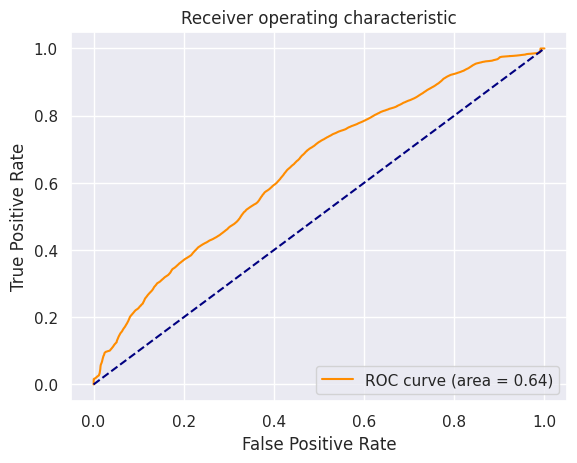

AUC score: 0.6435399696319899


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
conf_mat = confusion_matrix(y_test_oversam, prediction)
print(conf_mat)


# Calculate sensitivity and specificity
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)

print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))


# Predict probabilities
y_pred_proba = log_model.predict_proba(x_test_oversam)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_oversam, y_pred_proba)
roc_auc = roc_auc_score(y_test_oversam, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC score:", roc_auc)

Decision Tree Model Accuracy :  86.70084730996831 %

Confusion matrix :
[[139800  15161]
 [ 26056 128905]]

Sensitivity: 0.8318544666077271
Specificity: 0.9021624795916392

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87    154961
           1       0.89      0.83      0.86    154961

    accuracy                           0.87    309922
   macro avg       0.87      0.87      0.87    309922
weighted avg       0.87      0.87      0.87    309922



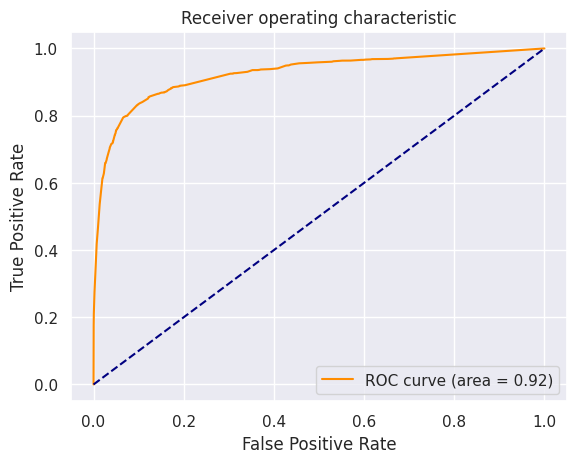

AUC score: 0.9248750585524635


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
conf_mat = confusion_matrix(y_test_oversam, prediction)
print(conf_mat)

# Calculate sensitivity and specificity
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
   
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

# Predict probabilities
y_pred_proba = decision_model.predict_proba(x_test_oversam)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_oversam, y_pred_proba)
roc_auc = roc_auc_score(y_test_oversam, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC score:", roc_auc)


<ipython-input-61-ce08800ebde5>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(x_train_oversam, y_train_oversam)


Random Forest Model Accuracy :  90.95740218506592 %

Confusion matrix :
[[151174   3787]
 [ 24238 130723]]

Sensitivity: 0.8435864507843909
Specificity: 0.9755615929169275

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    154961
           1       0.97      0.84      0.90    154961

    accuracy                           0.91    309922
   macro avg       0.92      0.91      0.91    309922
weighted avg       0.92      0.91      0.91    309922



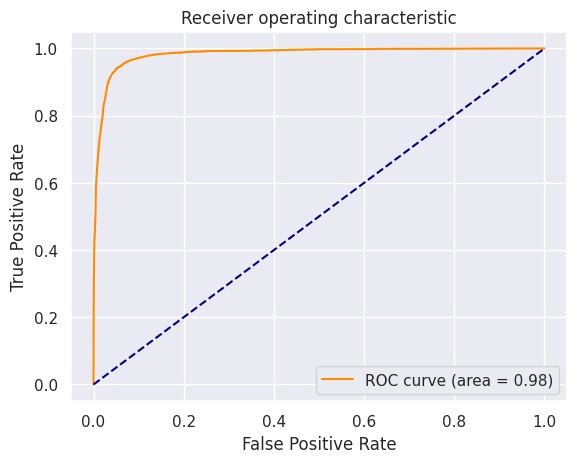

AUC score: 0.9832683943740586


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
conf_mat = confusion_matrix(y_test_oversam, prediction)
print(conf_mat)

# Calculate sensitivity and specificity
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)

print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

# Predict probabilities
y_pred_proba = RandomForest_model.predict_proba(x_test_oversam)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_oversam, y_pred_proba)
roc_auc = roc_auc_score(y_test_oversam, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC score:", roc_auc)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
conf_mat = confusion_matrix(y_test_oversam, prediction)
print(conf_mat)

# Calculate sensitivity and specificity
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

# Predict probabilities
y_pred_proba = svc_model.decision_function(x_test_oversam)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_oversam, y_pred_proba)
roc_auc = roc_auc_score(y_test_oversam, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC score:", roc_auc)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
conf_mat = confusion_matrix(y_test_oversam, prediction)
print(conf_mat)

# Calculate sensitivity and specificity
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)

print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

# Predict probabilities
y_pred_proba = XGB_model.predict_proba(x_test_oversam)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_oversam, y_pred_proba)
roc_auc = roc_auc_score(y_test_oversam, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC score:", roc_auc)

# Validation

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [ ]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [ ]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[78.34538879 79.56600362 76.17540687 78.56173677 70.46585256] 

76.6228777205539


In [ ]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [ ]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [ ]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[79.02350814 80.01808318 78.02893309 79.24016282 71.37042062] 

77.53622157174019


In [ ]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[79.70162749 80.37974684 78.02893309 80.00904568 71.64179104] 

77.95222882791369


### Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit=StratifiedShuffleSplit(n_splits=5,test_size=0.30)

In [ ]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [ ]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[74.4424352  75.04520796 73.59855335 73.0861965  74.59312839] 

74.15310427968656


In [ ]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [ ]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [ ]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[76.70283303 76.00964436 76.06992164 75.94936709 75.94936709] 

76.13622664255576


In [ ]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[74.74382158 75.34659433 75.10548523 75.34659433 74.29174201] 

74.96684749849307
